In [95]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import sys
import pickle
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [96]:
# read data
df = pd.read_table("../OpportunityUCIDataset/dataset/S1-ADL3.dat", sep = "\s+", header = None)
df=df.iloc[:,len(df.columns)-7:len(df.columns)]
df.index = range(len(df))
df.columns=range(len(df.columns))
df

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
33268,0,0,0,0,0,0,0
33269,0,0,0,0,0,0,0
33270,0,0,0,0,0,0,0
33271,0,0,0,0,0,0,0


In [97]:
# handling nan
for col in df.columns:
    if pd.isna(df.iloc[0, col]):
        df[col][0] = 0
    for row in range(1, len(df[col])):
        if pd.isna(df.iloc[row, col]):
            df[col][row] = df[col][row-1]

In [98]:
df.describe()

,0,1,2,3,4,5,6
count,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000
mean,1.782797,90.067983,49.547351,71.843897,176.360232,220.736693,70684.359781
std,1.576944,34.711165,89.486253,129.765250,202.824713,253.880570,153985.482245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,105.000000,0.000000,0.000000,409.000000,513.000000,0.000000
max,5.000000,105.000000,213.000000,322.000000,413.000000,522.000000,408512.000000


In [99]:
lst=[]
for i in range(len(df)):
    if(df[1][i]==0):
        lst.append(i)

In [100]:
df.drop(lst,inplace=True)

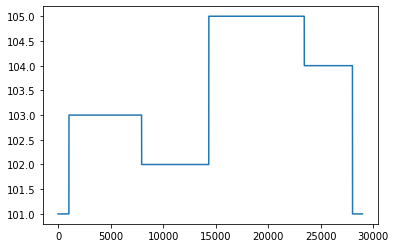

In [101]:
df.index = range(len(df))
df.columns=range(len(df.columns))
plt.plot(df[1])

In [102]:
label_binarizer = LabelBinarizer()
ydata= label_binarizer.fit_transform(df[1])
#plt.plot([ydata[i][4] for i in range(len(ydata))])
len(ydata)
ydatadf=pd.DataFrame(np.zeros((len(ydata),5)))
ydatadf.iloc[:,0:5]=ydata
ydatadf

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
28970,1,0,0,0,0
28971,1,0,0,0,0
28972,1,0,0,0,0
28973,1,0,0,0,0


In [103]:
xdatadf=pd.DataFrame(np.zeros((len(ydatadf),80)))
xdatadf[0]=[1 if i==1 else 0 for i in df[0]]
xdatadf[1]=[1 if i==2 else 0 for i in df[0]]
xdatadf[2]=[1 if i==4 else 0 for i in df[0]]
xdatadf[3]=[1 if i==5 else 0 for i in df[0]]
xdatadf[4]=[1 if i==0 else 0 for i in df[0]]

xdatadf[5]=[1 if i==201 else 0 for i in df[2]]
xdatadf[6]=[1 if i==202 else 0 for i in df[2]]
xdatadf[7]=[1 if i==203 else 0 for i in df[2]]
xdatadf[8]=[1 if i==204 else 0 for i in df[2]]
xdatadf[9]=[1 if i==205 else 0 for i in df[2]]
xdatadf[10]=[1 if i==206 else 0 for i in df[2]]
xdatadf[11]=[1 if i==207 else 0 for i in df[2]]
xdatadf[12]=[1 if i==208 else 0 for i in df[2]]
xdatadf[13]=[1 if i==209 else 0 for i in df[2]]
xdatadf[14]=[1 if i==210 else 0 for i in df[2]]
xdatadf[15]=[1 if i==211 else 0 for i in df[2]]
xdatadf[16]=[1 if i==212 else 0 for i in df[2]]
xdatadf[17]=[1 if i==213 else 0 for i in df[2]]
xdatadf[18]=[1 if i==0 else 0 for i in df[2]]

xdatadf[19]=[1 if i==301 else 0 for i in df[3]]
xdatadf[20]=[1 if i==302 else 0 for i in df[3]]
xdatadf[21]=[1 if i==303 else 0 for i in df[3]]
xdatadf[22]=[1 if i==304 else 0 for i in df[3]]
xdatadf[23]=[1 if i==305 else 0 for i in df[3]]
xdatadf[24]=[1 if i==306 else 0 for i in df[3]]
xdatadf[25]=[1 if i==307 else 0 for i in df[3]]
xdatadf[26]=[1 if i==308 else 0 for i in df[3]]
xdatadf[27]=[1 if i==309 else 0 for i in df[3]]
xdatadf[28]=[1 if i==310 else 0 for i in df[3]]
xdatadf[29]=[1 if i==311 else 0 for i in df[3]]
xdatadf[30]=[1 if i==312 else 0 for i in df[3]]
xdatadf[31]=[1 if i==313 else 0 for i in df[3]]
xdatadf[32]=[1 if i==314 else 0 for i in df[3]]
xdatadf[33]=[1 if i==315 else 0 for i in df[3]]
xdatadf[34]=[1 if i==316 else 0 for i in df[3]]
xdatadf[35]=[1 if i==317 else 0 for i in df[3]]
xdatadf[36]=[1 if i==318 else 0 for i in df[3]]
xdatadf[37]=[1 if i==319 else 0 for i in df[3]]
xdatadf[38]=[1 if i==320 else 0 for i in df[3]]
xdatadf[39]=[1 if i==321 else 0 for i in df[3]]
xdatadf[40]=[1 if i==322 else 0 for i in df[3]]
xdatadf[41]=[1 if i==323 else 0 for i in df[3]]
xdatadf[42]=[1 if i==0 else 0 for i in df[3]]

xdatadf[43]=[1 if i==401 else 0 for i in df[4]]
xdatadf[44]=[1 if i==402 else 0 for i in df[4]]
xdatadf[45]=[1 if i==403 else 0 for i in df[4]]
xdatadf[46]=[1 if i==404 else 0 for i in df[4]]
xdatadf[47]=[1 if i==405 else 0 for i in df[4]]
xdatadf[48]=[1 if i==406 else 0 for i in df[4]]
xdatadf[49]=[1 if i==407 else 0 for i in df[4]]
xdatadf[50]=[1 if i==408 else 0 for i in df[4]]
xdatadf[51]=[1 if i==409 else 0 for i in df[4]]
xdatadf[52]=[1 if i==410 else 0 for i in df[4]]
xdatadf[53]=[1 if i==411 else 0 for i in df[4]]
xdatadf[54]=[1 if i==412 else 0 for i in df[4]]
xdatadf[55]=[1 if i==413 else 0 for i in df[4]]
xdatadf[56]=[1 if i==0 else 0 for i in df[4]]

xdatadf[57]=[1 if i==501 else 0 for i in df[5]]
xdatadf[58]=[1 if i==502 else 0 for i in df[5]]
xdatadf[59]=[1 if i==503 else 0 for i in df[5]]
xdatadf[60]=[1 if i==504 else 0 for i in df[5]]
xdatadf[61]=[1 if i==505 else 0 for i in df[5]]
xdatadf[62]=[1 if i==506 else 0 for i in df[5]]
xdatadf[63]=[1 if i==507 else 0 for i in df[5]]
xdatadf[64]=[1 if i==508 else 0 for i in df[5]]
xdatadf[65]=[1 if i==509 else 0 for i in df[5]]
xdatadf[66]=[1 if i==510 else 0 for i in df[5]]
xdatadf[67]=[1 if i==511 else 0 for i in df[5]]
xdatadf[68]=[1 if i==512 else 0 for i in df[5]]
xdatadf[69]=[1 if i==513 else 0 for i in df[5]]
xdatadf[70]=[1 if i==514 else 0 for i in df[5]]
xdatadf[71]=[1 if i==515 else 0 for i in df[5]]
xdatadf[72]=[1 if i==516 else 0 for i in df[5]]
xdatadf[73]=[1 if i==517 else 0 for i in df[5]]
xdatadf[74]=[1 if i==518 else 0 for i in df[5]]
xdatadf[75]=[1 if i==519 else 0 for i in df[5]]
xdatadf[76]=[1 if i==520 else 0 for i in df[5]]
xdatadf[77]=[1 if i==521 else 0 for i in df[5]]
xdatadf[78]=[1 if i==522 else 0 for i in df[5]]
xdatadf[79]=[1 if i==523 else 0 for i in df[5]]
xdatadf[80]=[1 if i==0 else 0 for i in df[5]]

xdatadf[81]=[1 if i==406516 else 0 for i in df[6]]
xdatadf[82]=[1 if i==406517 else 0 for i in df[6]]
xdatadf[83]=[1 if i==404516 else 0 for i in df[6]]
xdatadf[84]=[1 if i==404517 else 0 for i in df[6]]
xdatadf[85]=[1 if i==406520 else 0 for i in df[6]]
xdatadf[86]=[1 if i==404520 else 0 for i in df[6]]
xdatadf[87]=[1 if i==406505 else 0 for i in df[6]]
xdatadf[88]=[1 if i==404505 else 0 for i in df[6]]
xdatadf[89]=[1 if i==406519 else 0 for i in df[6]]
xdatadf[90]=[1 if i==404519 else 0 for i in df[6]]
xdatadf[91]=[1 if i==406511 else 0 for i in df[6]]
xdatadf[92]=[1 if i==404511 else 0 for i in df[6]]
xdatadf[93]=[1 if i==406508 else 0 for i in df[6]]
xdatadf[94]=[1 if i==404508 else 0 for i in df[6]]
xdatadf[95]=[1 if i==408512 else 0 for i in df[6]]
xdatadf[96]=[1 if i==407521 else 0 for i in df[6]]
xdatadf[97]=[1 if i==405506 else 0 for i in df[6]]
xdatadf[98]=[1 if i==0 else 0 for i in df[6]]

xdatadf

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28970,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28971,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28972,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28973,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
sum=0
for i in xdatadf.iloc[:,:].describe().iloc[1]:
    sum=sum+i
print(sum)

5.999999999999999


In [105]:
# coverting data from 2-D to 3-D for LSTM
xdata = np.array(xdatadf)
xdata = [[xdata[i+j][:] for j in range(32)] for i in range(len(xdatadf) -32)]

ydata2 = np.array(ydatadf)
ydata2 = [ydata2[i+32] for i in range(len(ydatadf) - 32)]

In [106]:
xdata = np.array(xdata)
ydata2 = np.array(ydata2)

In [107]:
print(xdata.shape,ydata2.shape)

(28943, 32, 99) (28943, 5)


In [108]:
np.save('npy\s1adl3_x', xdata)
np.save('npy\s1adl3_y', ydata2)